In [420]:
from collections import defaultdict

saved_levels = defaultdict(lambda:[])
# read saved file

ancestors = 4
#sampled = 1024
sampled = 1300

if ancestors == 4:
    if sampled == 1024:
        descendants = 'descendants_k=10_g=8_m=4_s=2.1024_sampled.clusters.txt'
    else:
        descendants = 'descendants_k=10_g=9_m=4_s=2.1300_sampled.clusters.txt'
elif ancestors == 8:
    if sampled == 1000:
        descendants = 'descendants_k=8_g=12_m=8_s=2.1000_sampled.clusters.txt'
    elif sampled == 100:
        descendants = 'descendants_k=8_g=12_m=8_s=2.100_sampled.a_clusters.txt'

with open(descendants, 'r') as f:
    lines = [l.split('\n')[0] for l in f.readlines()]
    for l in lines:
        if l.startswith('>'):
            level = int(l.split('>')[1])
            #print(level)
        else:
            clusters = l.split(' ')
            saved_levels[level].append(clusters)

In [421]:
def hamming_distance(str1, str2):
    hamming_count = 0
    for i, char1 in enumerate(str1):
        char2 = str2[i]
        if char1 != char2:
            hamming_count += 1
    return hamming_count
        

([<matplotlib.axis.XTick at 0x12212a0f0>,
 <a list of 29 Text xticklabel objects>)

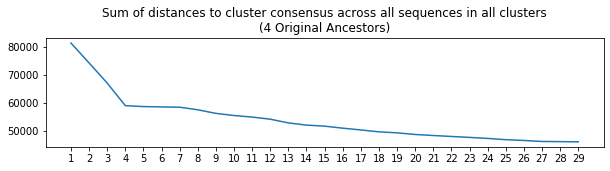

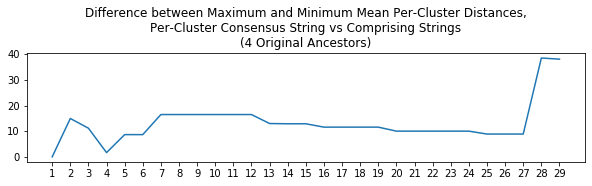

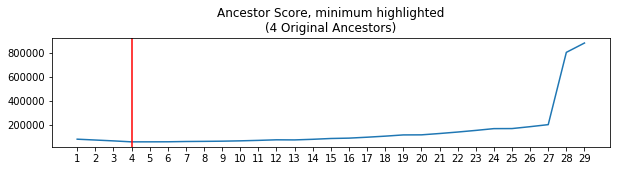

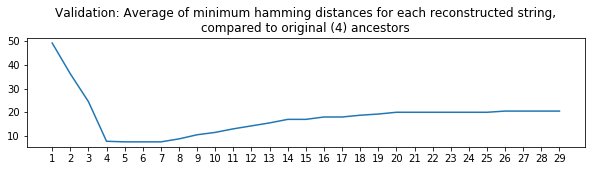

In [422]:
import numpy as np

spread = []
mins = []
reconstructeds = []
all_cluster_sum_distances = []

for level_number, clusters  in saved_levels.items():
    #print('\n~~~', level_number)
    cluster_rec_distances = []
    cluster_sum_distances = []
    recs_for_level = []
    num_clusters_with_1 = []
    for c in clusters:
        pos_counts = defaultdict(lambda:defaultdict(lambda:0))
        #print('\t\n\n', len(c))
        for seq in c:
            for i, nuc in enumerate(seq):
                pos_counts[i][nuc] += 1
            
        reconstructed = ''
        for pos in sorted(pos_counts.keys()):
            counts = pos_counts.get(pos)
            max_count = max(counts.values())
            for n in ['A', 'C', 'T', 'G']:
                if max_count == counts.get(n):
                    reconstructed += n
                    break

        # hamming distance between reconstructed string and each original cluster member
        #print(reconstructed)
        recs_for_level.append(reconstructed)
        all_hamming_distances = []
        for seq in c:
            dist = hamming_distance(seq, reconstructed)
            all_hamming_distances.append(dist)
            
        cluster_rec_distances.append(np.mean(all_hamming_distances))
        cluster_sum_distances.append(np.sum(all_hamming_distances))
        
    all_cluster_sum_distances.append(np.sum(cluster_sum_distances))
    #print(cluster_rec_distances)
    mins.append(min(cluster_rec_distances))
    spread.append(max(cluster_rec_distances) - min(cluster_rec_distances))
    reconstructeds.append(recs_for_level)
    if level_number > 30:
        break
        
# PLOTS !!!!


from matplotlib import pyplot as plt 
# Total sum 
plt.figure(figsize=(10,2))
plt.plot(all_cluster_sum_distances)
plt.title("Sum of distances to cluster consensus across all sequences in all clusters\n({} Original Ancestors)".format(ancestors))
plt.xticks(np.arange(0, 29), range(1, 30))

# Spread score
plt.figure(figsize=(10,2))
plt.plot(spread)
plt.title('Difference between Maximum and Minimum Mean Per-Cluster Distances,\nPer-Cluster Consensus String vs Comprising Strings\n({} Original Ancestors)'.format(ancestors))
plt.xticks(np.arange(0, 29), range(1, 30))


# Ancestor (combined score)
combine_score = []
for i, sum_distance in enumerate(all_cluster_sum_distances):
    combine_score.append(sum_distance + ((i)**3)*spread[i])
    
plt.figure(figsize=(10,2))
plt.plot(combine_score)
#plt.plot(all_cluster_sum_distances)
#plt.plot([1600*s for s in spread])
plt.title("Ancestor Score, minimum highlighted\n({} Original Ancestors)".format(ancestors))
plt.xticks(np.arange(0, 29), range(1, 30))

combine_score.index(min(combine_score))
plt.axvline(x=combine_score.index(min(combine_score)), c='r')




# Compare to original ancestors for baseline
original_4 = ['GGATGGTGTCCTCATCTAATGATGTCGGTAAAGAGTCTACCCCGAATGATTATCTGAGTCTCCCATGAACCAAGTCCGTGGTATAGTCCATACTCTGAAC',
            'CAAAACAGATAAACCAGCAAGATACATTGCAGAAGCTTGCCACCTTAGCAGGTTGTCAGATATCCGTTTCTGGAACTCCCGGGAGGACGATCGGAAGTTG',
            'AGCACAGGTACAAACACTTCAGGAATGATCTACTAAACTTTAGGGTCCGTACCTTTTATAATCCTTGCTAGCATCATGTTGAAGGTTAGAGGATTCCGAA',
            'ACCAGAAGTGGCGATCTCGCTAAAGCAGGTCACCACGGTCAGCGGGTGGCCATTTACTCGTGAAAACCATAGTCCGTGAAAGCTGGGCAACTTTAGTTGG']

original_8 = ['GGATGGTGTCCTCATCTAATGATGTCGGTAAAGAGTCTACCCCGAATGATTATCTGAGTCTCCCATGAACCAAGTCCGTGGTATAGTCCATACTCTGAAC',
 'CAAAACAGATAAACCAGCAAGATACATTGCAGAAGCTTGCCACCTTAGCAGGTTGTCAGATATCCGTTTCTGGAACTCCCGGGAGGACGATCGGAAGTTG',
 'AGCACAGGTACAAACACTTCAGGAATGATCTACTAAACTTTAGGGTCCGTACCTTTTATAATCCTTGCTAGCATCATGTTGAAGGTTAGAGGATTCCGAA',
 'ACCAGAAGTGGCGATCTCGCTAAAGCAGGTCACCACGGTCAGCGGGTGGCCATTTACTCGTGAAAACCATAGTCCGTGAAAGCTGGGCAACTTTAGTTGG',
 'GACCCTTAAGGCGACTGAGGGAAGCAACTATCGGAAGTATCGTACAGGTCGTAAAGTACCAGTACGGAAGAAGCAGGGAGTTATAATATTCACTACCACA',
 'ATTACCCGAGTTCACTTGTTTCAATCGCCCTCCCTTGACAGAACGTGCGTTACGTAGGAGTGCTTGACATACGGCGGCCGTCTGAGCTAGGACTATCGGA',
 'GCGTAATAATGGGATTTCAAATTTACCAGTTCCAGGTTGTCCAAGGGCTTGGCGGTGAGTCGACATGGAAAGATAAATTCCTCAGGTGCTGGCGCTCCCG',
 'TGGGGCCGCAGACACTACCTATTGGAGGGTGCTTAAACTATACAGCGCGCTAATTGTTAACTACTCCTTTGTGTCATAAGGGAGGGGAAACACGCGAGGA'
             ]


if ancestors == 4:
    original = original_4
elif ancestors == 8:
    original == original_8
    

plt.figure(figsize=(10,2))
 
match_to_original = []
for n in range(29):
    avg_min_differences = []
    for o in original: 
        #print(o)
        hs = []
        for r in reconstructeds[n]:
            hs.append(hamming_distance(o, r))
        avg_min_differences.append(min(hs))

    match_to_original.append(np.mean(avg_min_differences))
plt.plot(match_to_original)
plt.title("Validation: Average of minimum hamming distances for each reconstructed string,\ncompared to original ({}) ancestors".format(ancestors))
plt.xticks(np.arange(0, 29), range(1, 30))
